<a href="https://colab.research.google.com/github/nguyenhuynhtu11/CreditCard_Churn/blob/main/CreditCard_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [171]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [172]:
#import dataset
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Preprocessing

In [173]:
# Drop RowNumber, CustomerId, Surname and HasCrCard because its unnecessary
df.drop(['RowNumber', 'CustomerId', 'Surname', 'HasCrCard'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


In [174]:
# Check the missing value
check_missing = df.isnull().sum()
check_missing

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [175]:
df.shape

(10000, 10)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [177]:
# Check the number of unique value
df.select_dtypes(include = 'object').nunique()

Geography    3
Gender       2
dtype: int64

In [178]:
df.duplicated().sum()

0

In [179]:
# Check outliers
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,199992.480000,1.000000


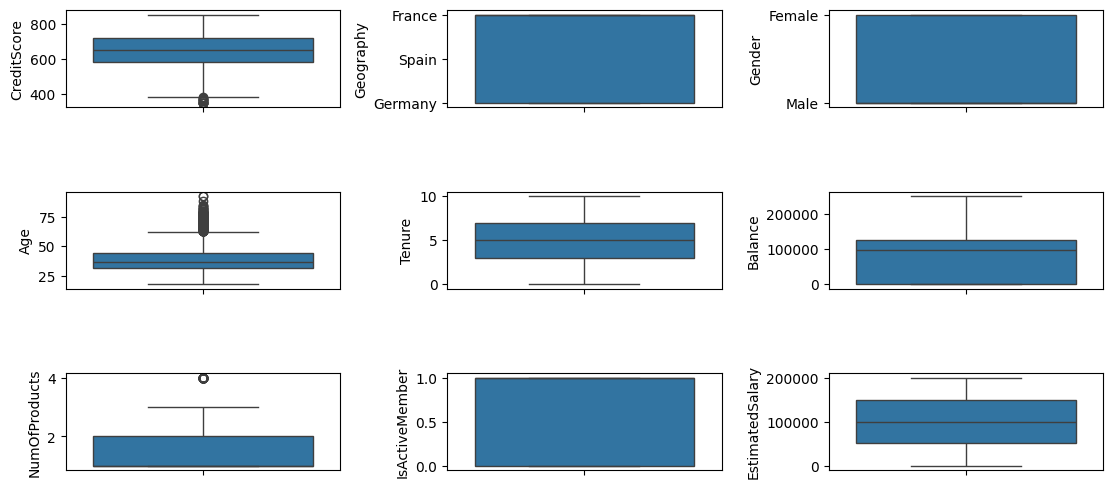

In [180]:
# Create the list column names
cols = list(df.iloc[ : , : -1])

# Create a matrix of subplots(3*3)
fig, axes = plt.subplots(3,3, figsize=(12, 6 ))

# Add padding around the subplots
fig.tight_layout(pad=4.0)

# Create a box plot based on the data
for i in range(len(cols)):
    sns.boxplot(ax=axes[i//3, i%3], y=df[cols[i]])


# Remove Outliers using IQR

In [181]:
df.shape

(10000, 10)

In [182]:
# specify the columns to remove outliers from dataframe
col_names = ["CreditScore", "NumOfProducts"]

# remove outliers for each selected columns using the IQR method
for col in col_names:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


In [183]:
df.shape

(9926, 10)

# Exploratory Data Analysis

In [198]:
df.groupby('Exited')['Exited'].count()

Exited
0    7963
1    1963
Name: Exited, dtype: int64

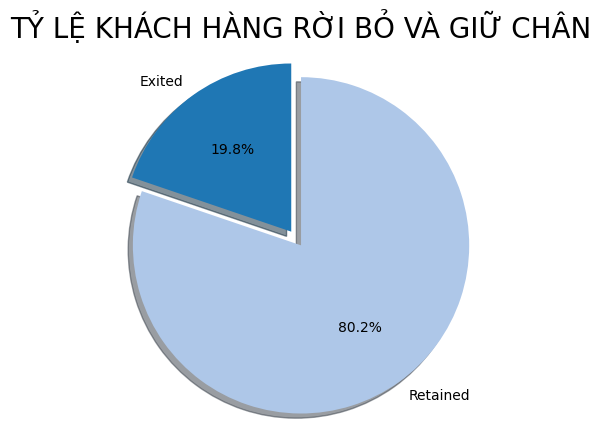

In [210]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(7, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("TỶ LỆ KHÁCH HÀNG RỜI BỎ VÀ GIỮ CHÂN", size = 20)
plt.show()

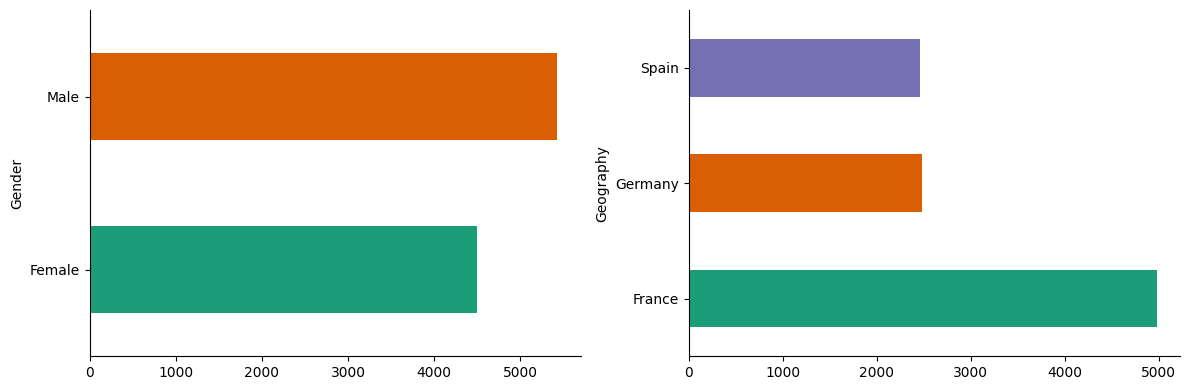

In [184]:
# List of categorical variables to plot
cat_vars = ['Gender', 'Geography']
def cat_plot(col):
  df.groupby(col).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
  plt.gca().spines[['top', 'right',]].set_visible(False)

# Create a chart grid for each categorical variable
plt.figure(figsize=(12, 4))
for i, var in enumerate(cat_vars, 1):
    plt.subplot(1, 2, i)
    cat_plot(var)

# adjust spacing between subplots
plt.tight_layout()

# show plot
plt.show()

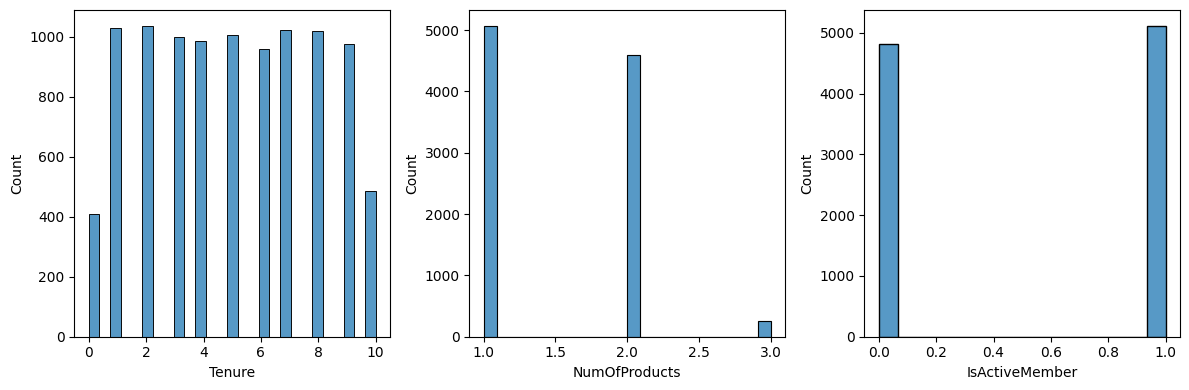

In [185]:
# List of numerical variables to plot
num_vars = ["Tenure", "NumOfProducts", "IsActiveMember"]

# Create a chart grid for each numerical variable
fig, axs = plt.subplots(1, 3, figsize = (12, 4))
axs = axs.ravel()

for i in range(len(num_vars)):
  sns.histplot(df[num_vars[i]], ax = axs[i])

fig.tight_layout()
plt.show()

<Axes: xlabel='Tenure', ylabel='Exited'>

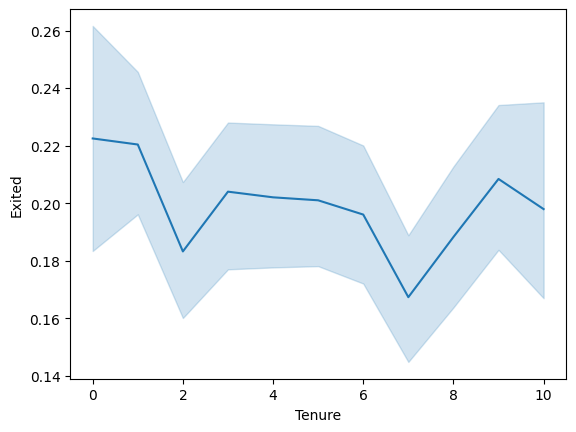

In [186]:
# Distribution of Tenure compare to Exited column
sns.lineplot(x = 'Tenure', y = 'Exited', data = df)

<Axes: xlabel='NumOfProducts', ylabel='Exited'>

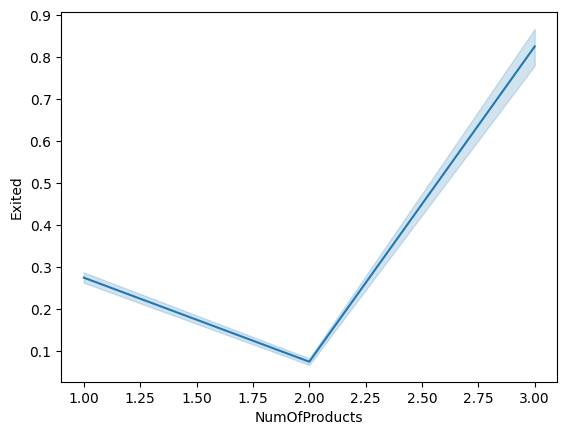

In [187]:
# Distribution of NumOfProducts compare to Exited column
sns.lineplot(x = 'NumOfProducts', y = 'Exited', data = df)

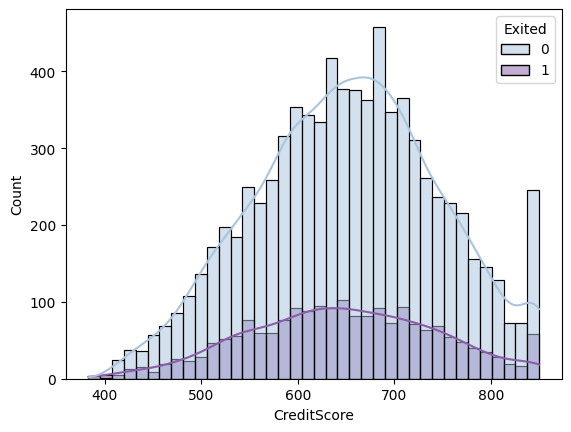

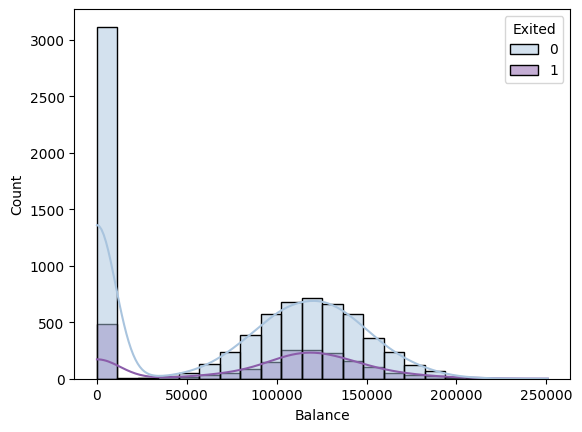

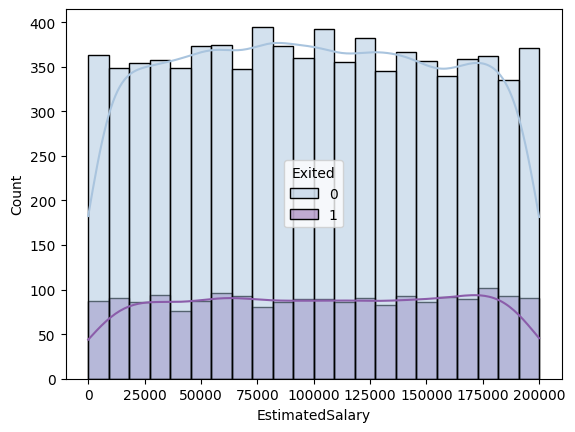

In [202]:
crecol= ['CreditScore', 'Balance', 'EstimatedSalary']
for i in crecol:
    sns.histplot (data = df, x= i, kde = True, hue = 'Exited', fill=True, palette='BuPu' )
    plt.show()

# Scatter plot

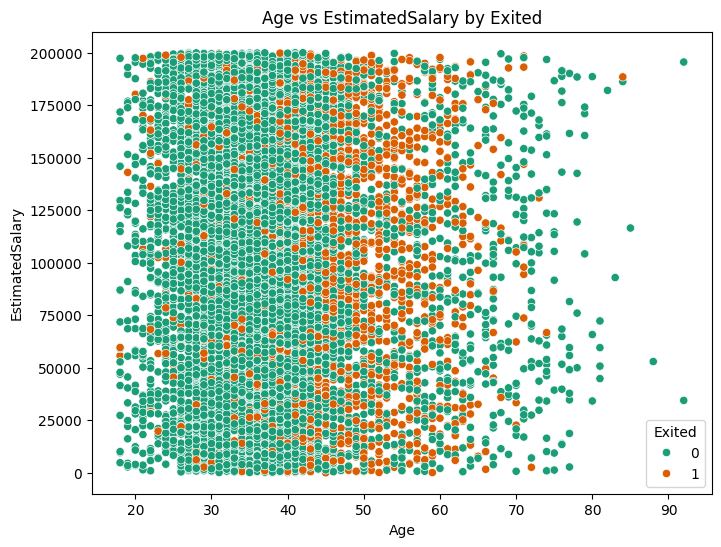

In [188]:
# Age vs EstimatedSalary by Exited
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, x= 'Age', y = 'EstimatedSalary', hue = 'Exited', palette = 'Dark2')
plt.title('Age vs EstimatedSalary by Exited')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.show()

In [191]:
# Encode labels Gender and Geography
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Geography'] = LabelEncoder().fit_transform(df['Geography'])

<Axes: >

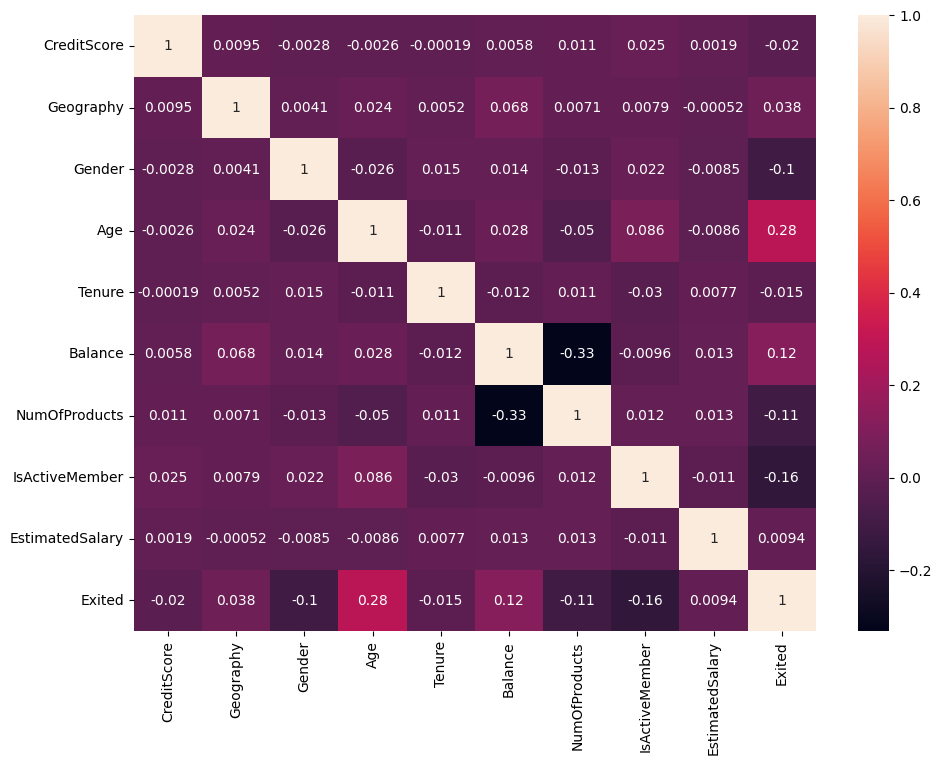

In [196]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize = (11, 8))
sns.heatmap(df.corr(), annot = True)